In [25]:
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
def get_db_url(user, host, password, db_name):
    """
    Order is important!! make sure you enter user, host, password, and then the name of the database you want to access
    """
    url = f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    return url

# Exercises
Create a file named seaborn_exercises.py or seaborn_exercises.ipynb for this exercise.

Use the iris database to answer the following quesitons:

1. What does the distribution of petal lengths look like?
2. Is there a correlation between petal length and petal width?
3. Would it be reasonable to predict species based on sepal width and sepal length?
4. Which features would be best used to predict species?

In [55]:
iris = sns.load_dataset('iris')

In [24]:
data('iris', show_doc = True)

iris

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Edgar Anderson's Iris Data

### Description

This famous (Fisher's or Anderson's) iris data set gives the measurements in
centimeters of the variables sepal length and width and petal length and
width, respectively, for 50 flowers from each of 3 species of iris. The
species are _Iris setosa_, _versicolor_, and _virginica_.

### Usage

    iris
    iris3

### Format

`iris` is a data frame with 150 cases (rows) and 5 variables (columns) named
`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

`iris3` gives the same data arranged as a 3-dimensional array of size 50 by 4
by 3, as represented by S-PLUS. The first dimension gives the case number
within the species subsample, the second the measurements with names `Sepal
L.`, `Sepal W.`, `Petal L.`, and `Petal W.`, and the third the species.

### Source

Fisher, R. A. (1936) The use of multiple measurements in taxonomi

In [56]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [71]:
sns.set_theme(palette = 'pastel')

1. What does the distribution of petal lengths look like?

<AxesSubplot:xlabel='petal_length', ylabel='Density'>

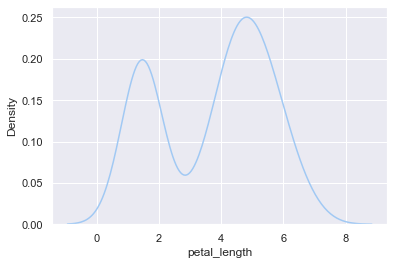

In [72]:
sns.kdeplot(data = iris, x = 'petal_length')

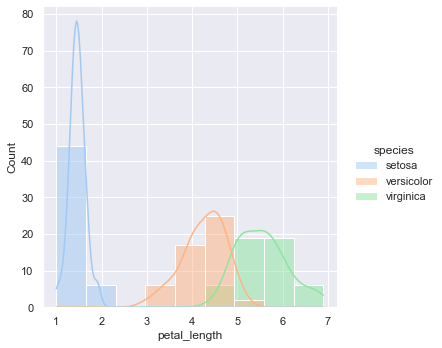

In [73]:
sns.displot(data = iris, x = 'petal_length', hue = 'species', kde = True)

<AxesSubplot:xlabel='petal_length', ylabel='species'>

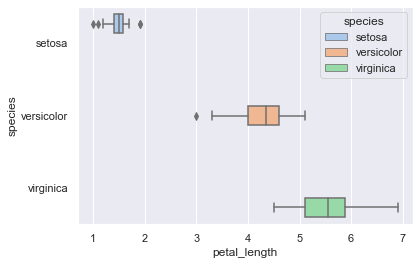

In [74]:
sns.boxplot(x = iris.petal_length, y = iris.species, hue = iris.species)

2. Is there a correlation between petal length and petal width?

In [75]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<AxesSubplot:>

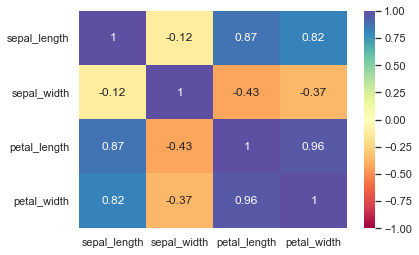

In [86]:
# here we show a corelation chart between all flower attributes
# Between Petal length and width we have a positive correlation of .96 (shown as dark purple)
# long petals == fat petals
sns.heatmap(iris.corr(), cmap = "Spectral", vmax = 1, vmin = -1, center = 0, annot = True)

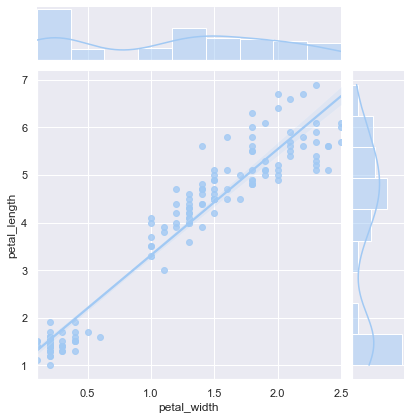

In [94]:
#deeper dive into petal lengths and width
#postivie corelation shown by the upward left trend of dots

sns.jointplot(data = iris, x = iris.petal_width, y = iris.petal_length,  kind = 'reg')

3. Would it be reasonable to predict species based on sepal width and sepal length?

When graphed, you can see that just by picking a flower and looking at it's sepal size you might not be able to accurately pick the right species. There is too much overlap. The only flower that has a consistantly wider width than than length, is the setosa species. but there is still some overlap and wouldn't be a very good predictor 

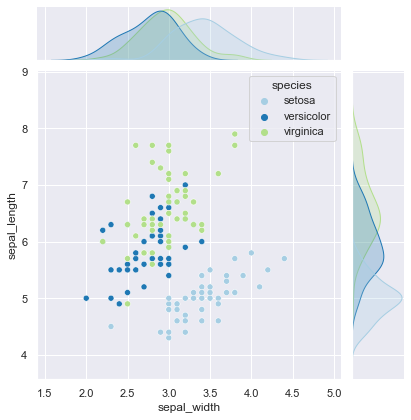

In [447]:
 sns.jointplot(data = iris, x = iris.sepal_width, y = iris.sepal_length, hue = iris.species, palette = 'Paired')

4. Which features would be best used to predict species?

Petal length and width would probably be better predictors. As you can see from the scatter chart below, the dots appear to be more clustered. There is no overlap with setosa and the other two species. And there is very minimal overlap with versicolor and virgina species (eaiser to see overlap in distribution line charts on the sides). The size and shape of the petals is a petter predictor.

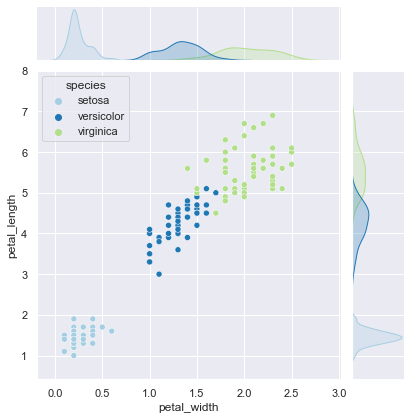

In [448]:
sns.jointplot(data = iris, x = iris.petal_width, y = iris.petal_length, hue = iris.species, palette = 'Paired')

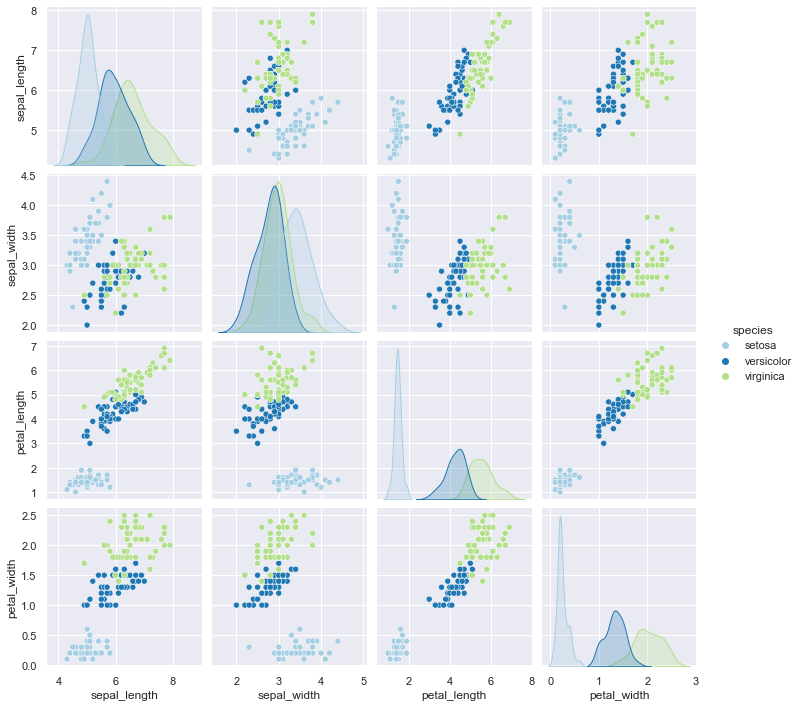

In [452]:
# this would be ideal case to look at a comparison of all the different variables
sns.pairplot(data = iris, hue = 'species', palette = 'Paired')

# 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice? 
- Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [152]:
anscombe = sns.load_dataset('anscombe')
sns.set_theme()

In [100]:
#data('anscombe', show_doc = True)

In [134]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


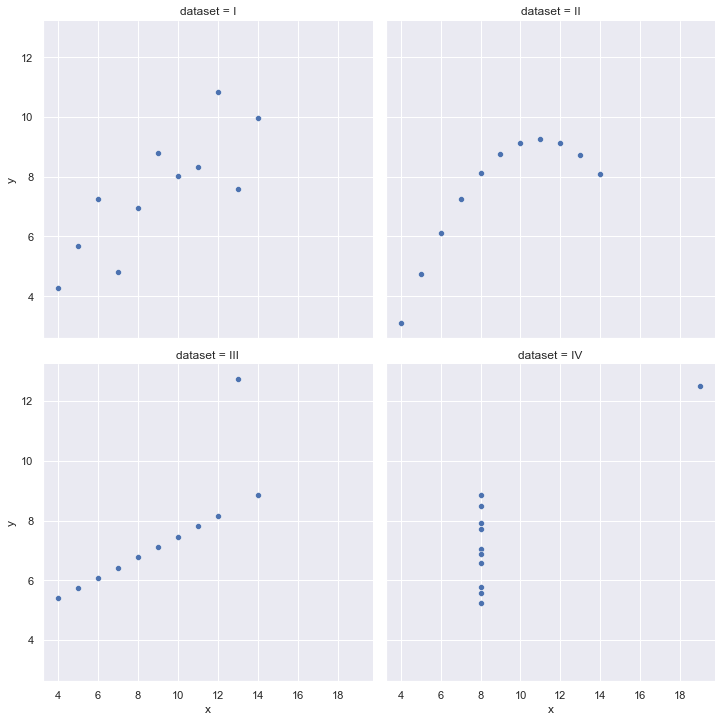

In [153]:
#plotting all x and y values according to the dataset number they're a apart of (col = 'dataset')
#use col_wrap = 2 to get 4 in a grid
sns.relplot(data = anscombe, x = anscombe.x, y = anscombe.y, col = anscombe.dataset, col_wrap = 2)


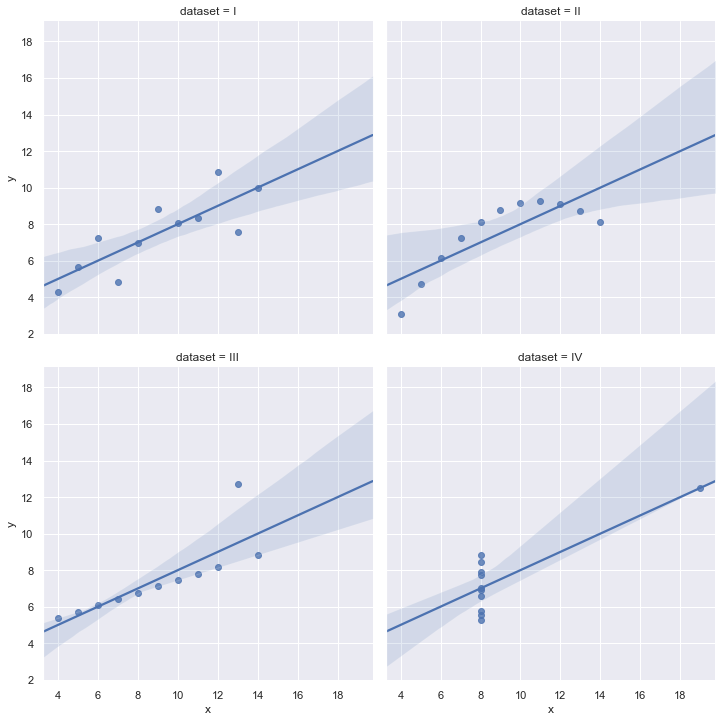

In [155]:
# show regression lines and confidence intervals (95% by default) broken down by dataset (same as above)
# you can see that eventhough the scatter plots look different (the nubmers are different)
# the slope of the regression line is still the same
# take away: numbers in a dataset can be different at but have the same or similar trend lines

sns.lmplot(x = 'x', y = 'y', data = anscombe, col = 'dataset', truncate = False, col_wrap = 2 )

# 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [158]:
insectsprays = data('InsectSprays')
#data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [171]:
insectsprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


<AxesSubplot:xlabel='count'>

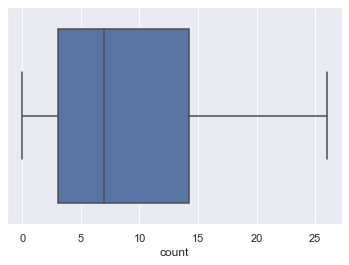

In [172]:
# box plot showing all data for the insect sprays
sns.boxplot(data=insectsprays, x='count')

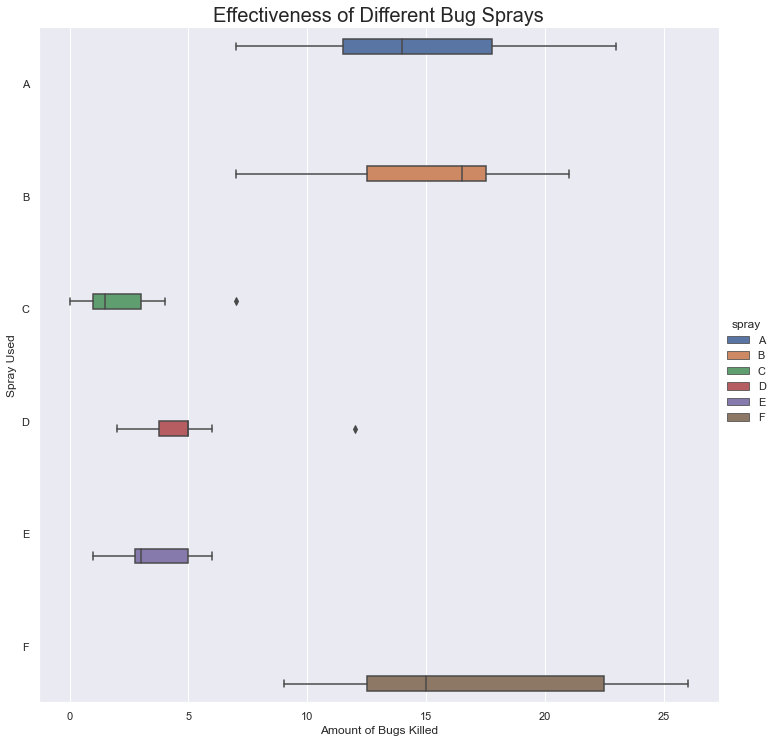

In [467]:
# box plot showing each spray type broken out
sns.catplot(data=insectsprays, x='count', y = 'spray', hue = 'spray', kind = 'box', height = 10)
#sns.boxplot(data=insectsprays, x='count', y = 'spray', hue = 'spray')
plt.title('Effectiveness of Different Bug Sprays', fontsize = 20)
plt.xlabel('Amount of Bugs Killed')
plt.ylabel('Spray Used')

plt.show()


# 3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:
- Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
- Does whether or not a province is Catholic influence fertility?
- What measure correlates most strongly with fertility?

In [201]:
swiss = data('swiss')
data('swiss', show_doc = True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [196]:
swiss.median()

Fertility           70.40
Agriculture         54.10
Examination         16.00
Education            8.00
Catholic            15.14
Infant.Mortality    20.00
dtype: float64

In [195]:
swiss.mean()

Fertility           70.142553
Agriculture         50.659574
Examination         16.489362
Education           10.978723
Catholic            41.143830
Infant.Mortality    19.942553
dtype: float64

In [197]:
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


In [210]:
# set the is catholic rate to 75 
swiss['is_catholic'] = swiss['Catholic'] > 75

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


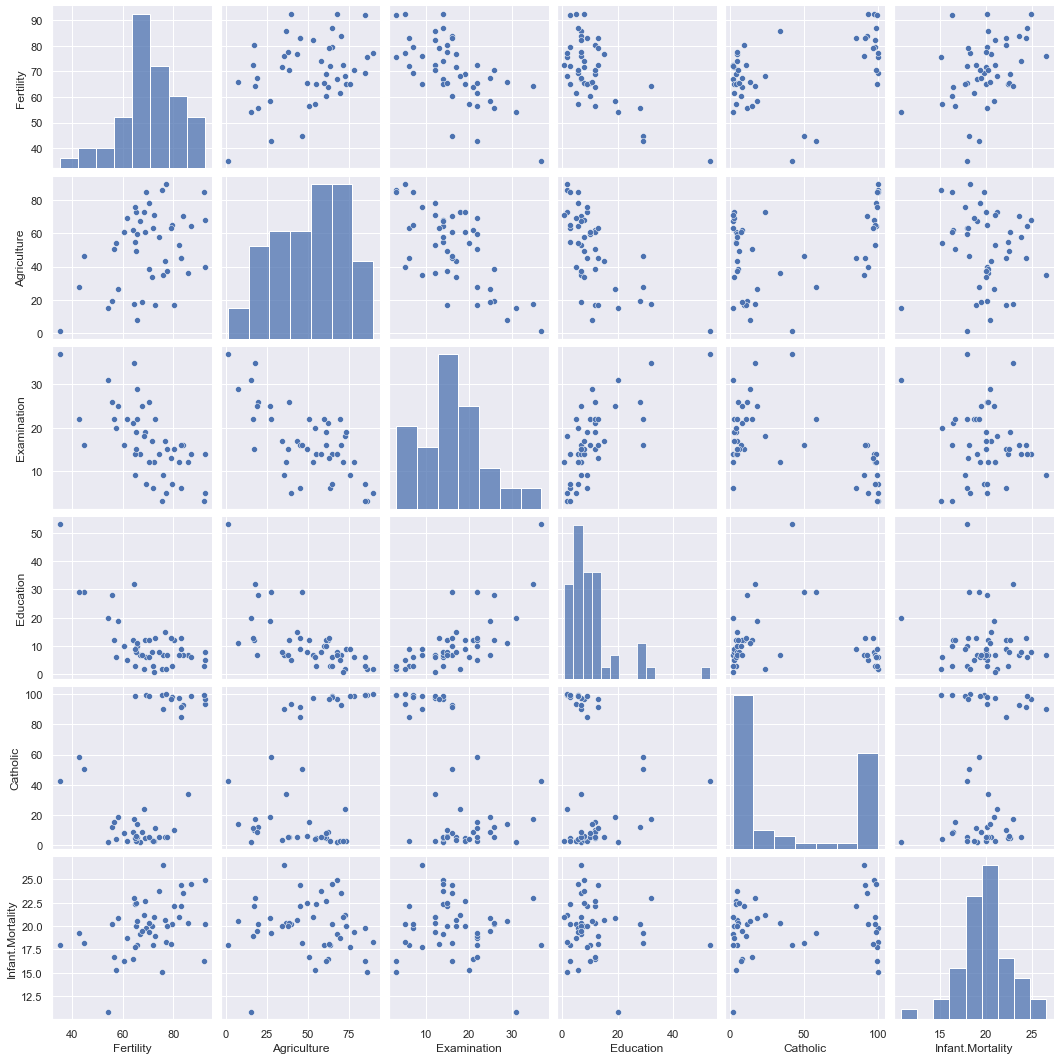

In [205]:
# some exploring
# notice some trends with education and exam scores and fertility
# notice catholic and noncatholic scores are pretty far apart. Not a lot of people in the middle of the catholic score
sns.pairplot(swiss)

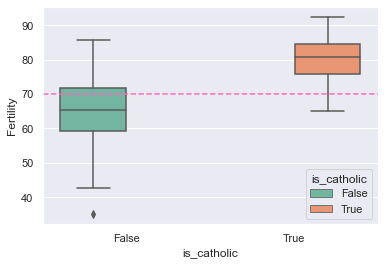

In [259]:
# box plot showing the fertility rates broken out by is catholic or not
sns.boxplot(data = swiss, x = 'is_catholic', y = 'Fertility', hue = 'is_catholic', palette='Set2')
plt.axhline(swiss['Fertility'].mean(), linestyle = 'dashed', c = 'hotpink', label = 'Mean Fertility')

plt.show()

As shown by this box plot, the Mean fertility rate for the for the provinces that are more than 75 percent Catholic, is higher than the provinces that are less than 75 catholic.

The pink line in the graph above shows the mean fertility rate for the entire population

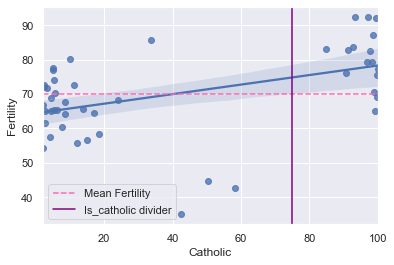

In [261]:
sns.regplot(data = swiss, x = 'Catholic', y = 'Fertility')
plt.axhline(swiss['Fertility'].mean(), c = 'hotpink', linestyle = 'dashed', label = 'Mean Fertility')
plt.axvline(75, c = 'purple', label = 'Is_catholic divider')

plt.legend()
plt.show()

# 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [252]:
def get_db_url(user, host, password, db_name):
    """
    Order is important!! make sure you enter user, host, password, and then the name of the database you want to access
    """
    url = f'mysql+pymysql://{user}:{password}@{host}/{db_name}'
    return url
from env import host, user, password

In [263]:
#get url for chipotle database
url_chipotle = get_db_url(user, host, password, 'chipotle')

In [264]:
#import orders table from sql as chipotle_df
chipotle_df = pd.read_sql('SELECT * FROM orders', url_chipotle)

In [265]:
chipotle_df

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [266]:
#get rid of dollar sign in itme_price column and change the type to a float
chipotle_df['item_price'] = chipotle_df['item_price'].str.replace('$', '').astype(float)

In [361]:
chipotle_df['item_name'].value_counts().nlargest(4)

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Name: item_name, dtype: int64

In [367]:
#create dataset with sum of everythings
#sort by quantity in descending order
# top 4 are more popular
# this differs from value counts because actually summing up quantity
popular_items = chipotle_df.groupby('item_name').sum().sort_values('quantity', ascending = False).head(4)
popular_items

,id,order_id,quantity,item_price
item_name,,,,
Chicken Bowl,1780635,713926,761,7342.73
Chicken Burrito,1238770,497303,591,5575.82
Chips and Guacamole,1122252,449959,506,2201.04
Steak Burrito,818163,328437,386,3851.43


In [396]:
#drop unneeeded columns
pop_items_revenue = popular_items.drop(['id', 'order_id', 'quantity'], axis = 1)
# use reset index to give my stupid series an index
pop_items_revenue = pop_items_revenue.reset_index()
pop_items_revenue

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Chips and Guacamole,2201.04
3,Steak Burrito,3851.43


/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


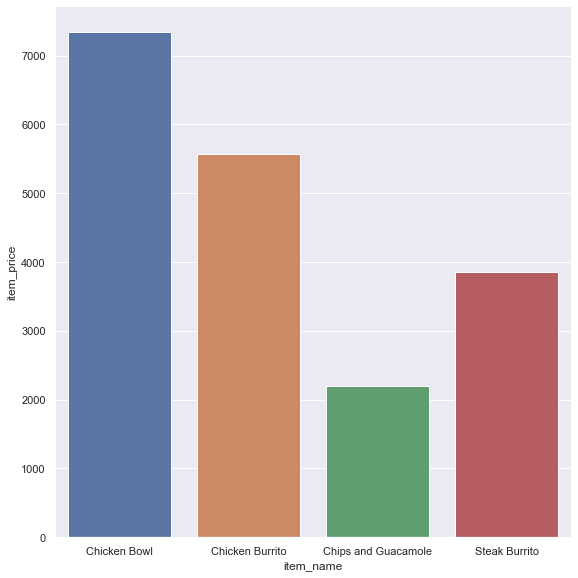

In [471]:
sns.catplot(data = pop_items_revenue, y = 'item_price', x = 'item_name', kind = 'bar', size = 8)

# 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [407]:
data('sleepstudy', show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [398]:
sleepstudy = data('sleepstudy')

In [399]:
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [406]:
# explore data. Group by subject 
sleepstudy.groupby('Subject').describe()

Reaction                                                         \
           count       mean        std       min         25%        50%   
Subject                                                                   
308         10.0  342.13383  79.821763  249.5600  266.565675  339.14585   
309         10.0  215.23298  10.812193  202.9778  205.878375  214.79605   
310         10.0  231.00127  21.855996  194.3322  222.670275  233.58080   
330         10.0  303.22142  22.909199  280.2396  285.299075  298.99285   
331         10.0  309.43605  27.242607  285.0000  290.885925  297.78375   
332         10.0  307.30207  64.306126  234.8606  258.638625  309.88320   
333         10.0  316.15831  30.068208  276.7693  291.459000  315.91810   
334         10.0  295.30205  41.855607  243.3647  268.155125  281.60780   
335         10.0  250.07004  13.833852  235.3110  238.337025  248.45210   
337         10.0  375.72101  59.623789  291.6112  321.884900  378.78545   
349         10.0  275.83447  42.937942  230.3167  241.871775  262.34820   
350         10.0  313.60268  63.360558  243.4543  256.227650  299.32060   
351         10.0  290.09775  28.978811  250.5265  270.377275  284.16785   
352         10.0  337.42154  47.602380  221.6771  331.872750  350.78445   
369         10.0  306.03464  37.460429  257.2424  273.356775  306.47875   
370         10.0  291.70177  59.208212  225.2640  239.293850  274.34270   
371         10.0  294.98404  36.505989  259.2658  273.806825  280.48000   
372         10.0  317.88613  35.822804  269.4117  289.778650  320.11960   

                               Days                                           
                75%       max count mean      std  min   25%  50%   75%  max  
Subject                                                                       
308      406.568525  466.3535  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
309      221.482225  237.3142  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
310      244.491675  261.0125  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
330      315.033350  354.0487  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
331      319.155800  371.5811  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
332      327.090950  454.1619  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
333      336.964875  362.0428  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
334      325.023375  377.2990  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
335      254.599825  273.9472  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
337      413.584250  458.9167  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
349      301.467700  351.6451  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
350      375.312975  394.4872  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
351      303.489600  347.5655  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
352      358.931100  388.5417  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
369      334.513375  366.5131  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
370      346.737550  372.2288  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
371      299.600950  369.4692  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0  
372      341.035375  369.1417  10.0  4.5  3.02765  0.0  2.25  4.5  6.75  9.0

In [409]:
sleepstudy.groupby('Days').describe()

Reaction                                                          \
        count        mean        std       min         25%        50%   
Days                                                                    
0        18.0  256.651806  32.129451  199.0539  235.171250  253.41165   
1        18.0  264.495756  33.430334  194.3322  242.972425  272.95840   
2        18.0  265.361900  29.473423  202.9778  245.223675  263.56815   
3        18.0  282.992011  38.857738  204.7070  255.073275  281.18930   
4        18.0  288.649422  42.537887  207.7161  267.882100  282.48390   
5        18.0  308.518456  51.769625  215.9618  284.271400  307.31560   
6        18.0  312.178256  63.173720  213.6303  280.466725  294.10515   
7        18.0  318.750583  50.103963  217.7272  293.769100  333.17030   
8        18.0  336.629506  60.199716  224.2957  309.397575  336.01375   
9        18.0  350.851222  66.986155  237.2466  348.585400  365.31835   

                           Subject                                        \
             75%       max   count        mean        std    min     25%   
Days                                                                       
0     271.412725  321.5426    18.0  341.277778  20.851874  308.0  331.25   
1     288.416250  313.8058    18.0  341.277778  20.851874  308.0  331.25   
2     282.367100  326.8785    18.0  341.277778  20.851874  308.0  331.25   
3     310.415900  346.8555    18.0  341.277778  20.851874  308.0  331.25   
4     315.913525  365.7324    18.0  341.277778  20.851874  308.0  331.25   
5     336.056050  414.6901    18.0  341.277778  20.851874  308.0  331.25   
6     349.440400  454.1619    18.0  341.277778  20.851874  308.0  331.25   
7     347.988550  416.6923    18.0  341.277778  20.851874  308.0  331.25   
8     368.147025  455.8643    18.0  341.277778  20.851874  308.0  331.25   
9     376.031450  466.3535    18.0  341.277778  20.851874  308.0  331.25   

                            
        50%     75%    max  
Days                        
0     336.0  351.75  372.0  
1     336.0  351.75  372.0  
2     336.0  351.75  372.0  
3     336.0  351.75  372.0  
4     336.0  351.75  372.0  
5     336.0  351.75  372.0  
6     336.0  351.75  372.0  
7     336.0  351.75  372.0  
8     336.0  351.75  372.0  
9     336.0  351.75  372.0

In [422]:
# there are 18 subjects
sleepstudy.Subject.nunique()

18

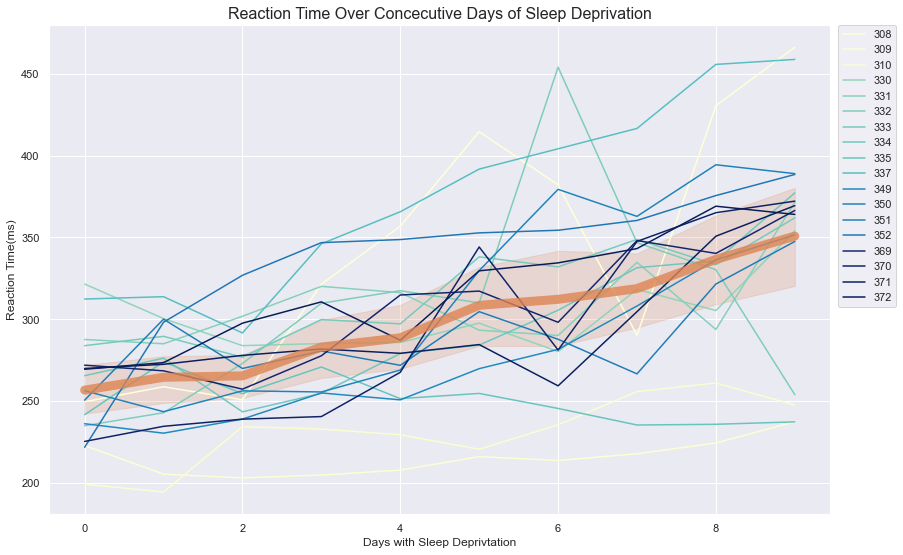

In [483]:
plt.figure(figsize = (14,9))
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject', legend= 'full', palette = 'YlGnBu')
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', estimator = 'mean', linewidth = 9, alpha = 0.8)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title('Reaction Time Over Concecutive Days of Sleep Deprivation', fontsize = 16)
plt.xlabel('Days with Sleep Deprivtation')
plt.ylabel('Reaction Time(ms)')
plt.show()



### Takeaways: 
- as the subjects got less and less sleep, their reaction times went up (aka they got slower)
- while each subjects' goes up and down, the mean goes up rather smoothly
- this means, the less sleep they got, the slower they were